task 4.1. Реализовать BiRNN & LSTM по предсказанию цены Bitcoin (или можете взять любой другой финансовый инструмент) Анализ USD

nominal    798
data       798
curs       798
cdx        798
dtype: int64


C:\Users\vtako\AppData\Local\Temp\ipykernel_9332\3780765724.py:23: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





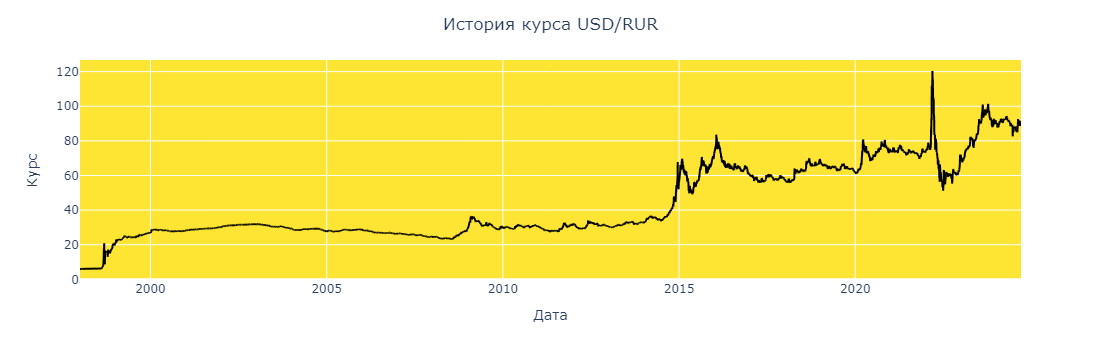

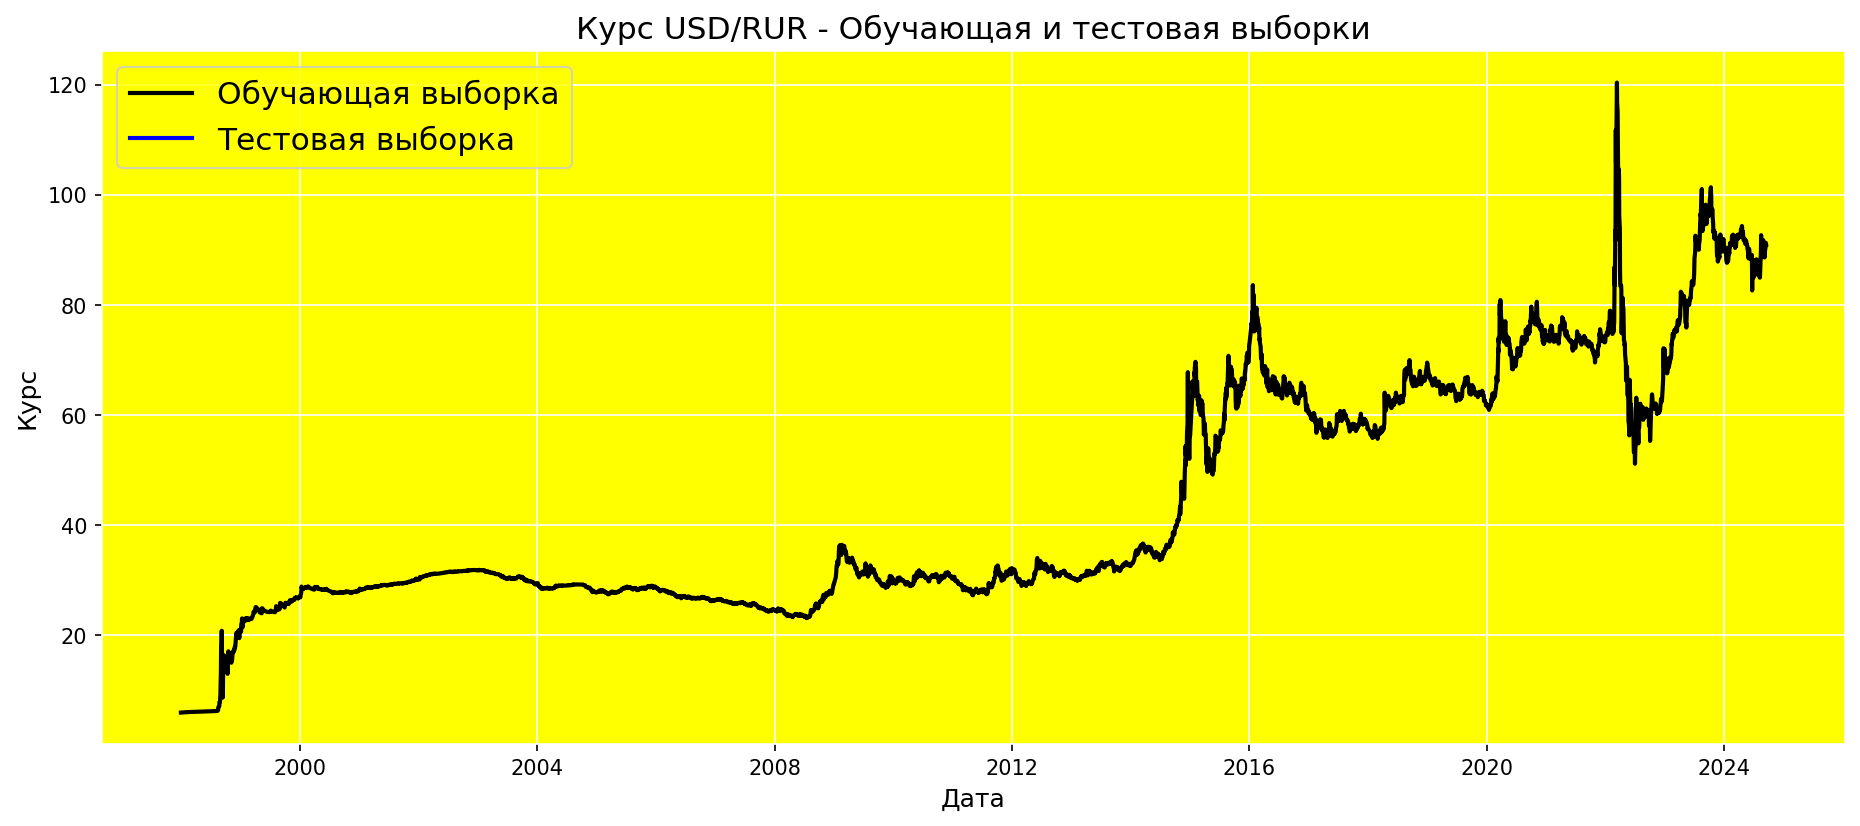

X_train Shape:  (7118, 60, 1)
y_train Shape:  (7118, 1)
X_test Shape:   (247, 60, 1)
y_test Shape:   (247, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 0.0197 - val_loss: 0.0034
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 9.0509e-04 - val_loss: 0.0029
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 8.9918e-04 - val_loss: 0.0023
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 5.6587e-04 - val_loss: 0.0021
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 5.3470e-04 - val_loss: 0.0020
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 5.2847e-04 - val_loss: 0.0019
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 4.0635e-04 - val_loss: 0.0017
Epoch 9/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 4.7553e-04 - val_loss: 0.0017
Epoch 10/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 3.9681e-04 - val_loss: 0.0015
Epoch 11/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 3.6356e-04 - val_loss: 0.0014
Epoc

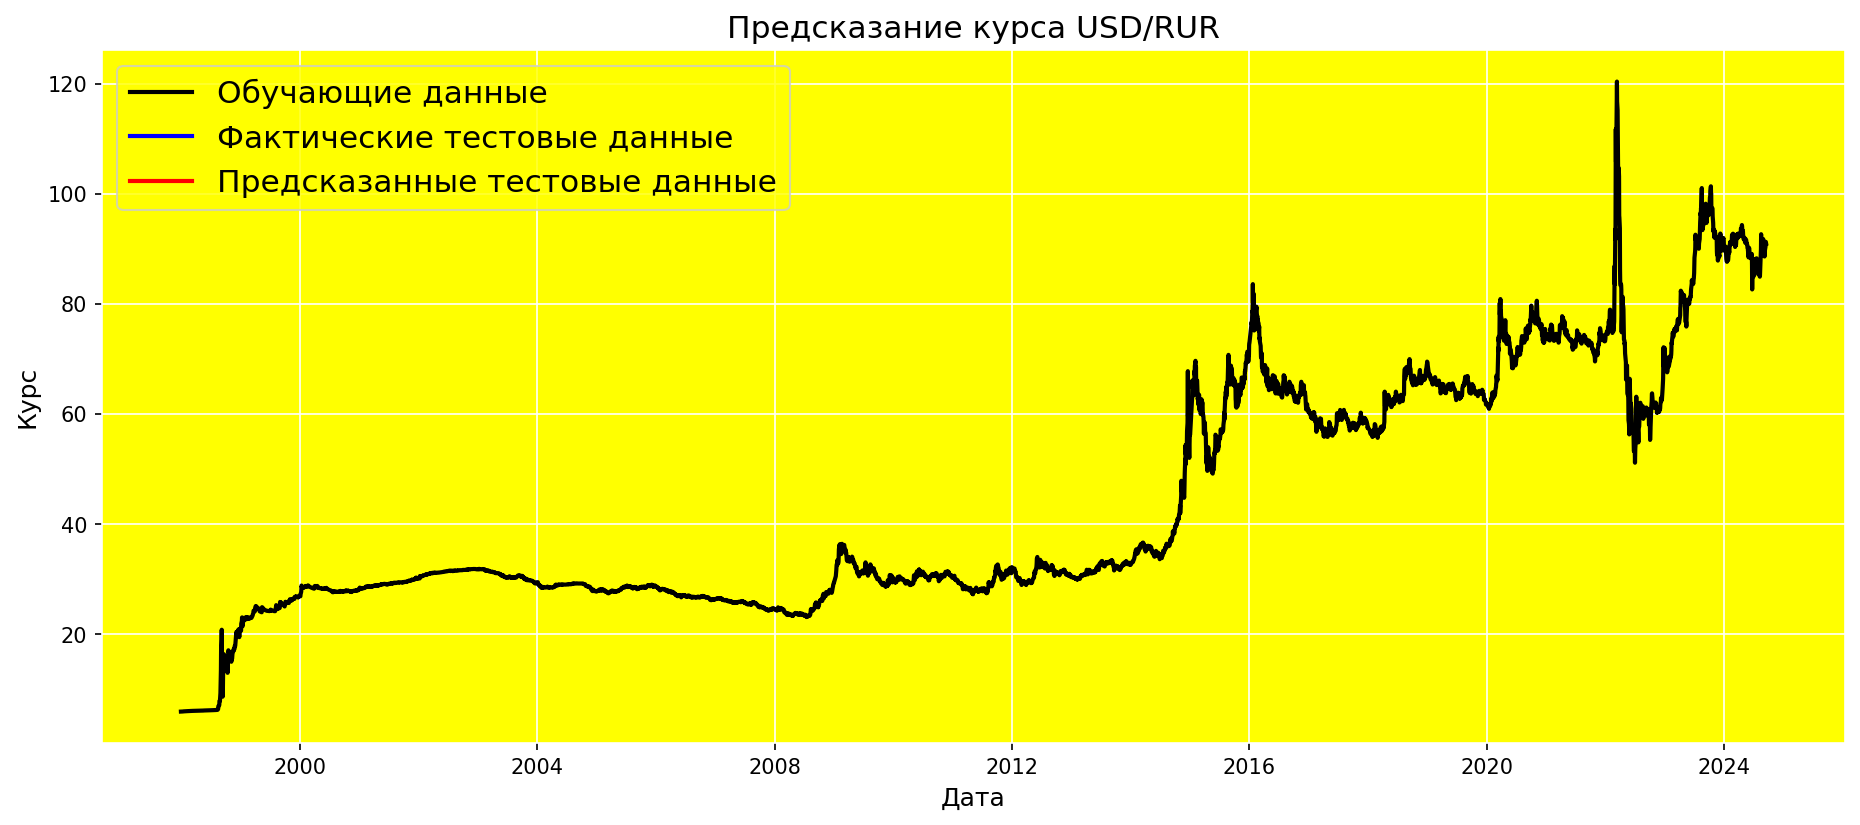

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from keras import Model
from keras.layers import Input, Dense, Dropout, LSTM
import tensorflow as tf

# Загрузка данных
file_path = r'C:\Users\vtako\Desktop\Project\DL homework 4\dataset_usdrur_1998-2024.csv'
df = pd.read_csv(file_path, encoding='cp1251', delimiter=';')

# Приведение даты к формату datetime и замена запятых в столбце 'curs'
df['data'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df['curs'] = df['curs'].str.replace(',', '.').astype(float)

# Проверка на пропуски
print(df.isna().sum())

# Обработка пропущенных значений (например, заполнение медианным значением)
df['curs'].fillna(df['curs'].median(), inplace=True)

# Сортировка по дате и сброс индексов
df.sort_values(by='data', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Визуализация данных
fig = px.line(x=df['data'], y=df['curs'], labels={'x': 'Дата', 'y': 'Курс'})
fig.update_traces(line_color='black')
fig.update_layout(title={'text': "История курса USD/RUR", 'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')
fig.show()

# Разделение данных на обучающую и тестовую выборки
test_size = df[df['data'].dt.year == 2023].shape[0]

# Визуализация обучающей и тестовой выборок
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')
plt.plot(df['data'][:-test_size], df['curs'][:-test_size], color='black', lw=2)
plt.plot(df['data'][-test_size:], df['curs'][-test_size:], color='blue', lw=2)
plt.title('Курс USD/RUR - Обучающая и тестовая выборки', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Курс', fontsize=12)
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

# Масштабирование данных
scaler = MinMaxScaler()
scaler.fit(df['curs'].values.reshape(-1, 1))

window_size = 60

# Обучающие данные
train_data = df['curs'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1, 1))

X_train = []
y_train = []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])

# Тестовые данные
test_data = df['curs'][-test_size - window_size:]
test_data = scaler.transform(test_data.values.reshape(-1, 1))

X_test = []
y_test = []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i - window_size:i, 0])
    y_test.append(test_data[i, 0])

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

# Определение модели LSTM
def define_model():
    input1 = Input(shape=(window_size, 1))
    x = LSTM(units=64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units=64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()

    return model

# Создание и обучение модели
model = define_model()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# Оценка модели
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

# Обратное преобразование масштабированных данных
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

# Визуализация результатов
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')
plt.plot(df['data'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['data'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['data'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Предсказание курса USD/RUR', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Курс', fontsize=12)
plt.legend(['Обучающие данные', 'Фактические тестовые данные', 'Предсказанные тестовые данные'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()
